# Titanic EDA

## Import Libraries:

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno


from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, label_binarize

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')




## Load the Dataset:

In [3]:
train_data = pd.read_csv('C:/Users/HP/Desktop/Data Science/club/train.csv')
test_data =  pd.read_csv('C:/Users/HP/Desktop/Data Science/club/test.csv')

In [4]:
# view training set:

train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#view test set:

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data summary:

In [6]:
print(train_data.info())
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print(test_data.info())
test_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

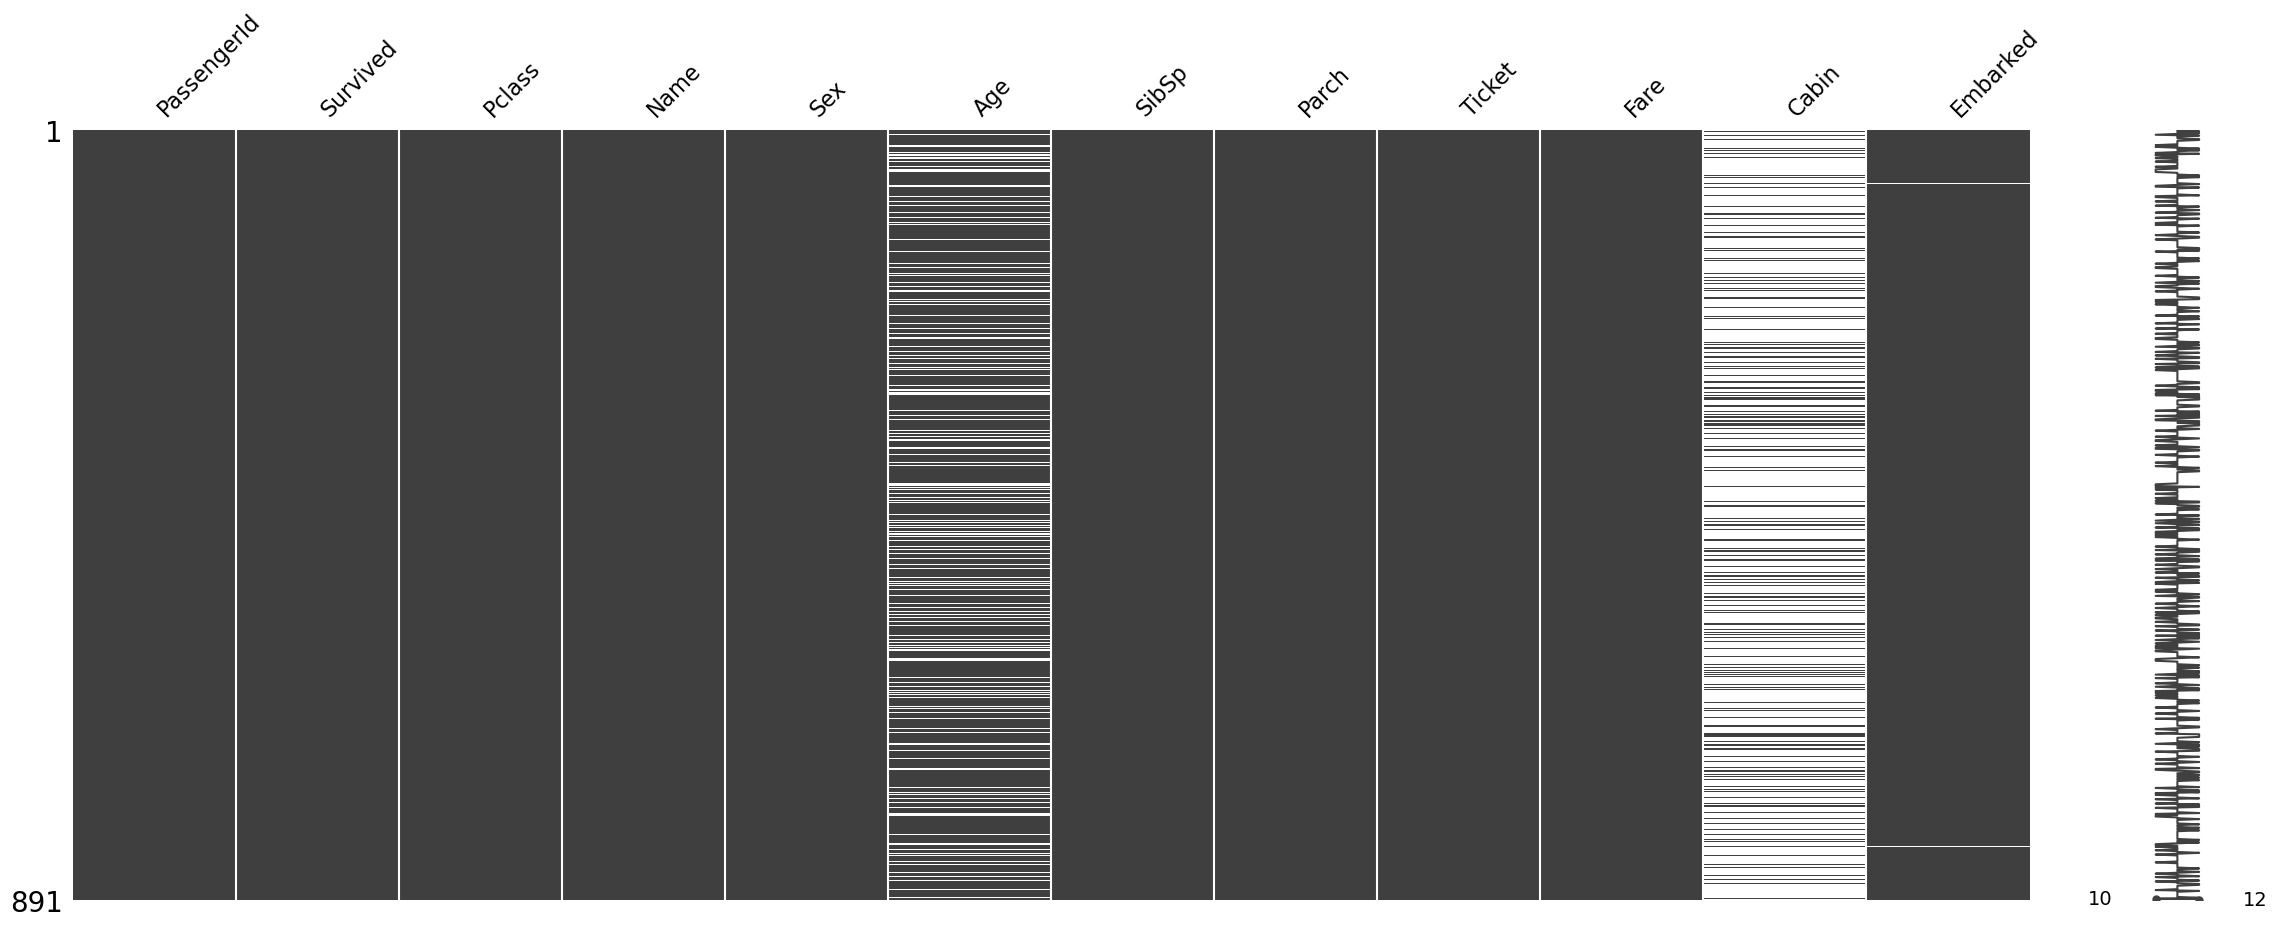

In [8]:
#visualise missing values of training set:

missingno.matrix(train_data, figsize =(28, 10))

The white lines represent the missing values. In the above graph of training set, we can see that that are a lot of missing values in 'Age' and 'Cabin' column, and two missing values in 'Embarked' column.

<Axes: >

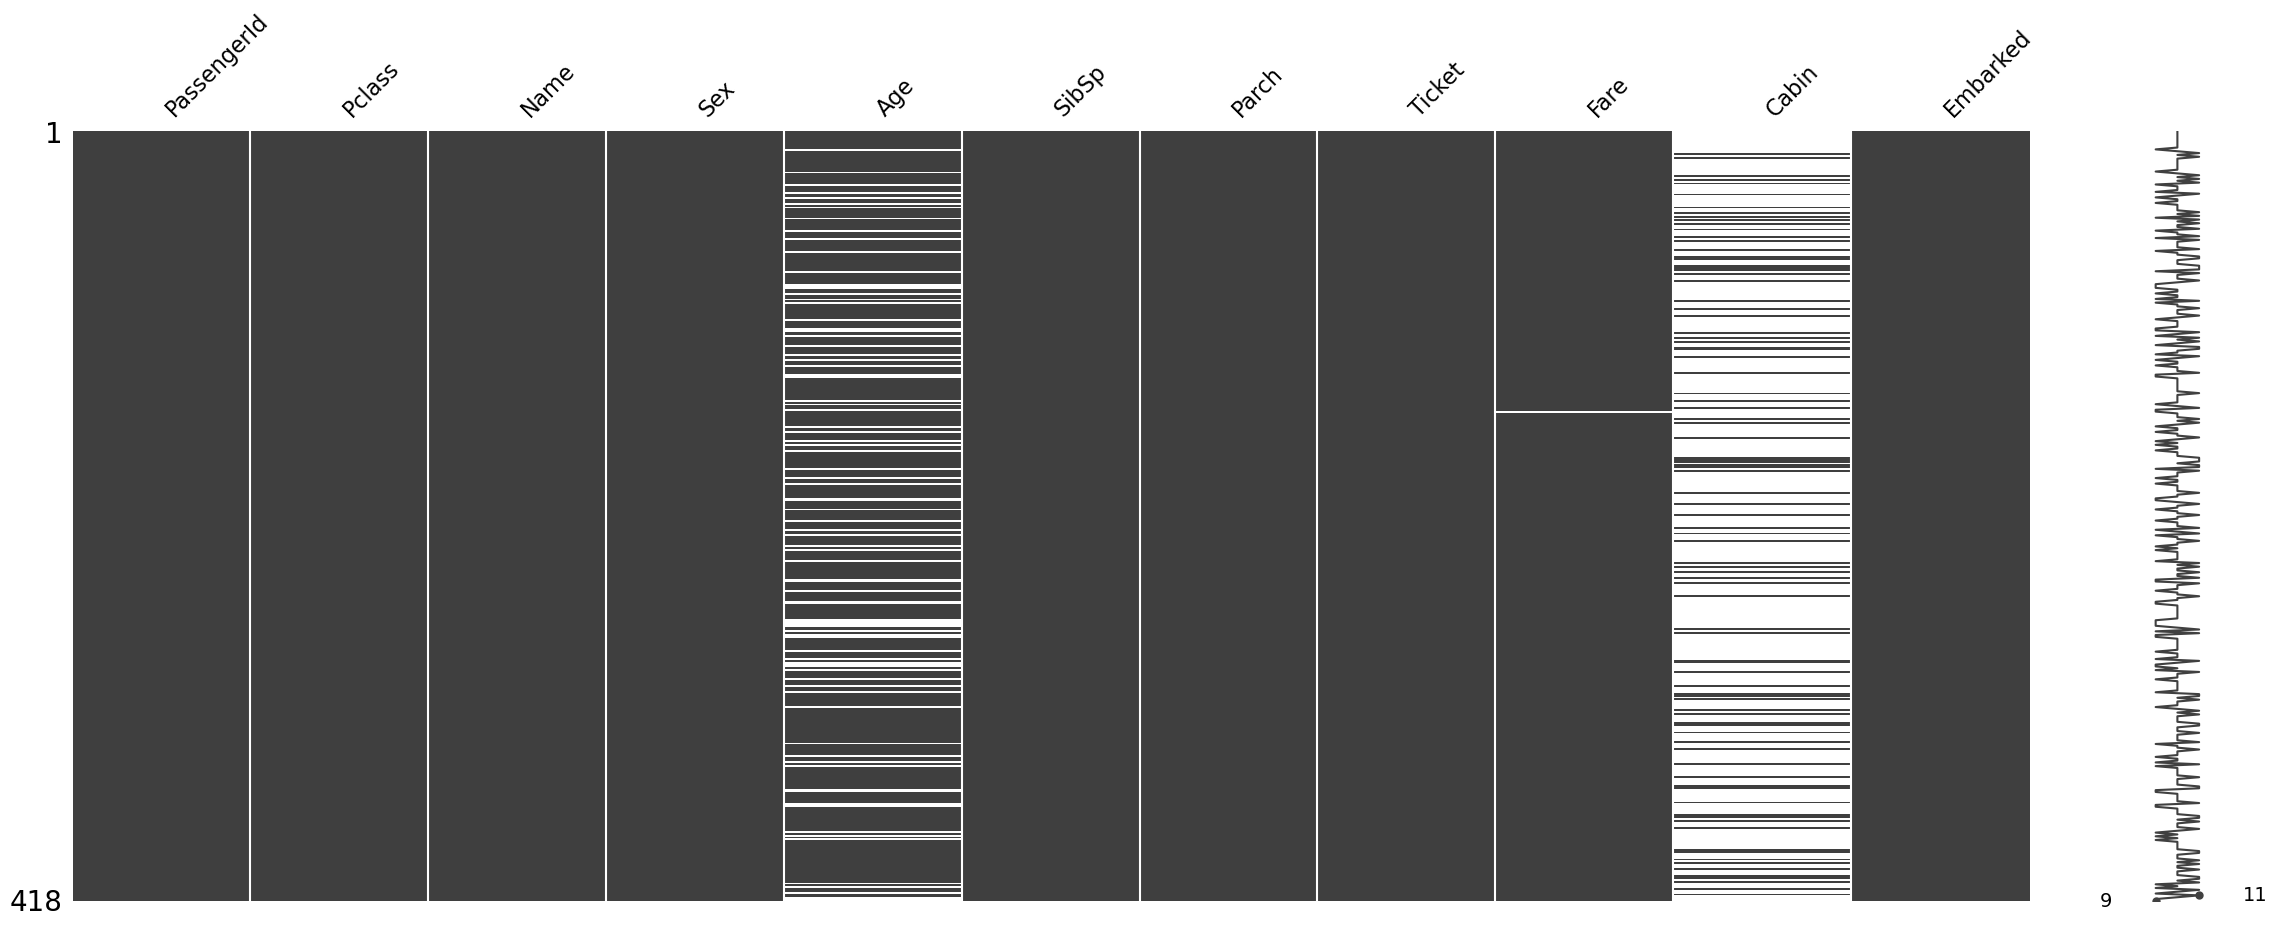

In [9]:
#visualise missing values of test set:

missingno.matrix(test_data, figsize =(28, 10))

In the above test dataset, there are a lot of missing values in 'Age' and 'Cabin' column, while only one missing value in 'Fare' column.

In [10]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


To check the correlation between numerical features of the data using a heatmap:

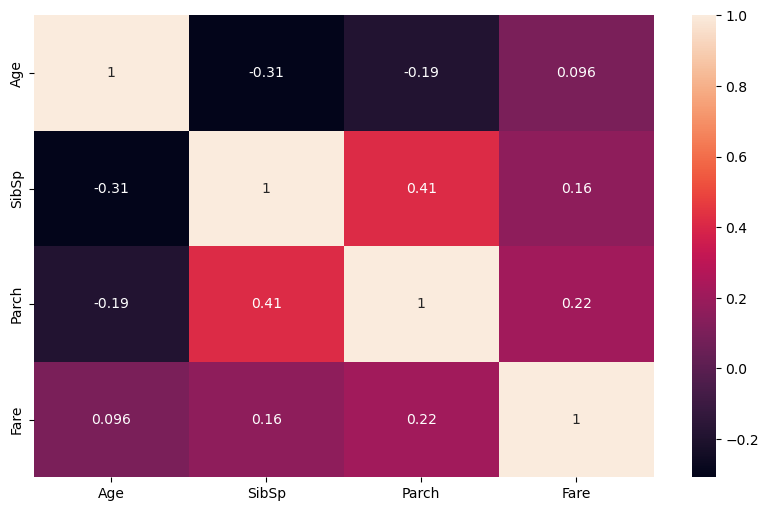

In [12]:
df_num = train_data[['Age', 'SibSp', 'Parch', 'Fare']]
fig = plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_num.corr(),annot=True)

## Exploratory Data Analysis:

Dropping columns 'PassengerId', 'Name' and 'Cabin': 

In [13]:
cols_ex = ['PassengerId','Name','Cabin','Ticket']
ex_train = train_data.drop(cols_ex, axis=1)
ex_test = test_data.drop(cols_ex, axis=1)

In [14]:
ex_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
ex_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


Analyzing each column:

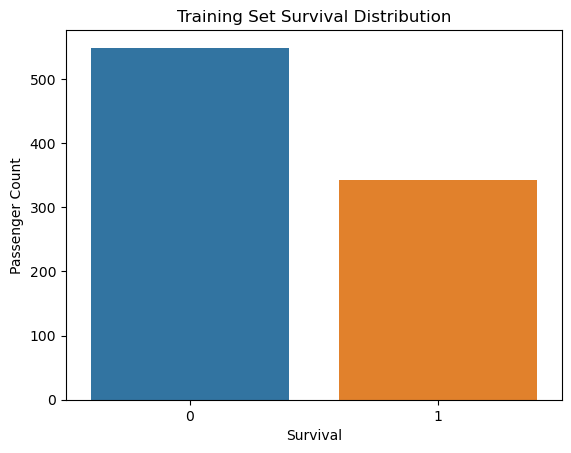

0    549
1    342
Name: Survived, dtype: int64


In [16]:
# Survived:

sns.countplot(x='Survived', data=ex_train)
plt.xlabel('Survival')
plt.ylabel('Passenger Count')
plt.title('Training Set Survival Distribution')
plt.show()
print(ex_train['Survived'].value_counts())


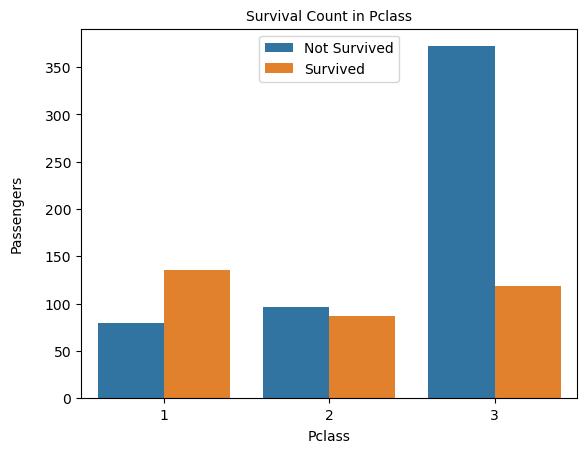

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [17]:
# Pclass:

sns.countplot(x='Pclass', hue='Survived', data=ex_train)
plt.xlabel('Pclass', size=10, labelpad=5)
plt.ylabel('Passengers', size=10, labelpad=15)  
plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})
plt.title('Survival Count in Pclass', size=10)
plt.show()
    
print(ex_train['Pclass'].value_counts())

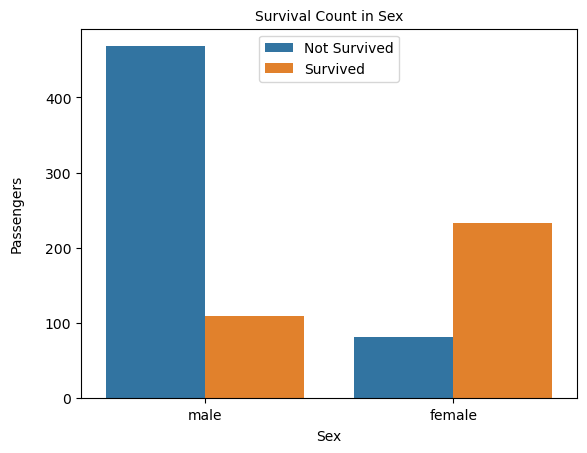

male      577
female    314
Name: Sex, dtype: int64


In [18]:
# Sex:

sns.countplot(x='Sex', hue='Survived', data=ex_train)
plt.xlabel('Sex', size=10, labelpad=5)
plt.ylabel('Passengers', size=10, labelpad=15)  
plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})
plt.title('Survival Count in Sex', size=10)
plt.show()
    
print(ex_train['Sex'].value_counts())

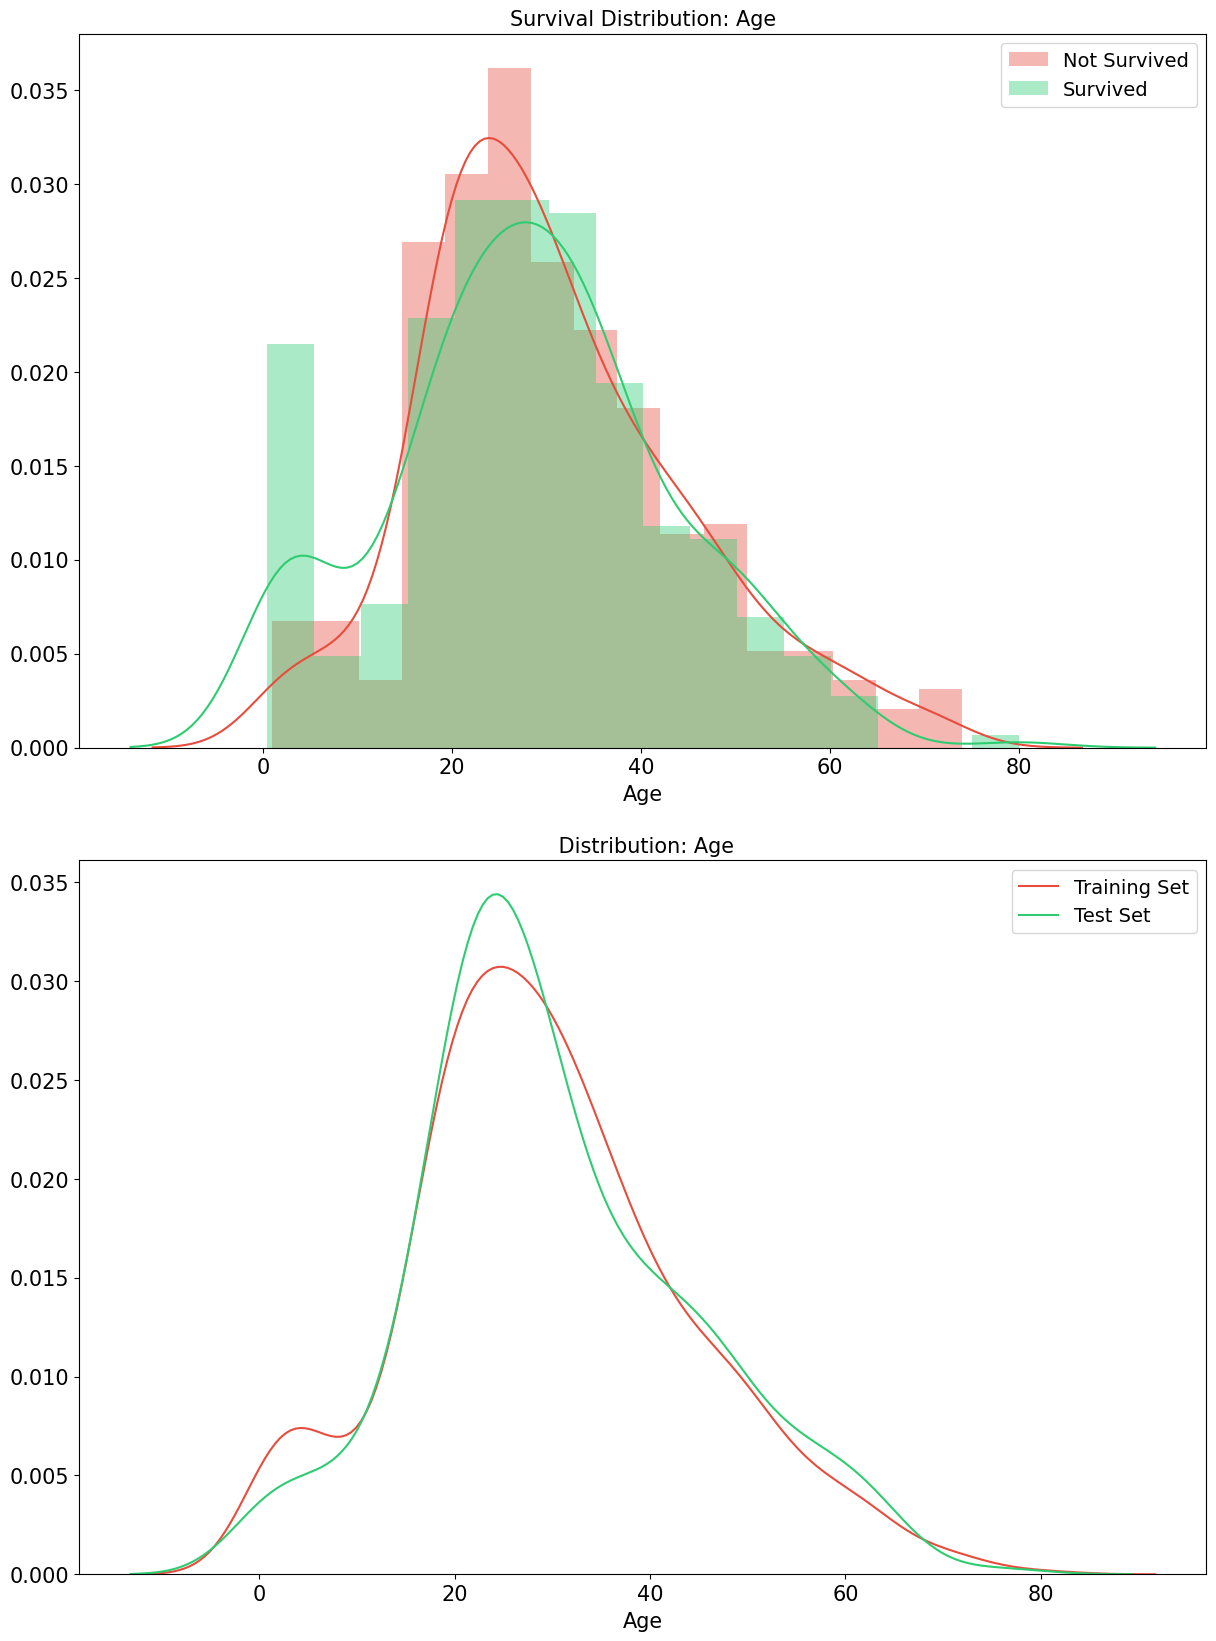

In [25]:
# Age:

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
fig.tight_layout(h_pad=6)
    
survived = ex_train['Survived'] == 1

    # Distribution of survival in feature
sns.distplot(ex_train[~survived]['Age'], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0])
sns.distplot(ex_train[survived]['Age'], label='Survived', hist=True, color='#2ecc71', ax=axs[0])

    # Distribution of feature in dataset
sns.distplot(ex_train['Age'], label='Training Set', hist=False, color='#e74c3c', ax=axs[1])
sns.distplot(ex_test['Age'], label='Test Set', hist=False, color='#2ecc71', ax=axs[1])
    
axs[0].set_xlabel('Age', size=15, labelpad=5)
axs[1].set_xlabel('Age', size=15, labelpad=5)
axs[0].set_ylabel('')
axs[1].set_ylabel('')
    
axs[0].tick_params(axis='x', labelsize=15)
axs[1].tick_params(axis='x', labelsize=15)
axs[0].tick_params(axis='y', labelsize=15)
axs[1].tick_params(axis='y', labelsize=15)
    
axs[0].legend(loc='upper right', prop={'size': 14})
axs[1].legend(loc='upper right', prop={'size': 14})
    
axs[0].set_title('Survival Distribution: Age', size=15)
axs[1].set_title(' Distribution: Age', size=15)
    
plt.show()

Filling the missing values in 'Age' column in training and test dataset:

In [26]:
for ex in [ex_train, ex_test]:
    ex['Age'].fillna(ex.groupby(['Pclass','Sex'])['Age'].transform('mean'), inplace=True)
    
print('Missing age in training set:{}' .format(ex_train['Age'].isnull().sum()))
print('Missing age in test set:{}' .format(ex_test['Age'].isnull().sum()))


Missing age in training set:0
Missing age in test set:0


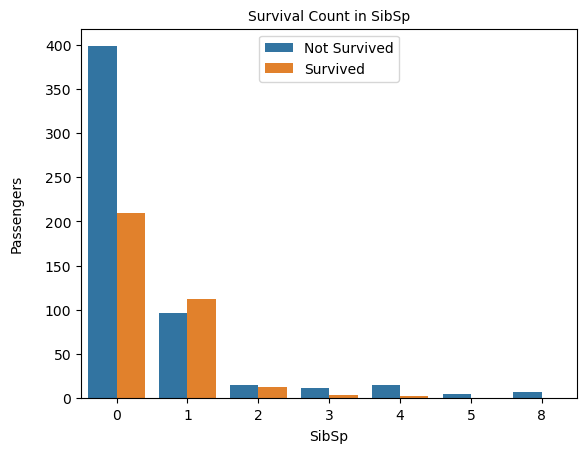

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [28]:
# SibSp:

sns.countplot(x='SibSp', hue='Survived', data=ex_train)
plt.xlabel('SibSp', size=10, labelpad=5)
plt.ylabel('Passengers', size=10, labelpad=15)  
plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})
plt.title('Survival Count in SibSp', size=10)
plt.show()
    
print(ex_train['SibSp'].value_counts())

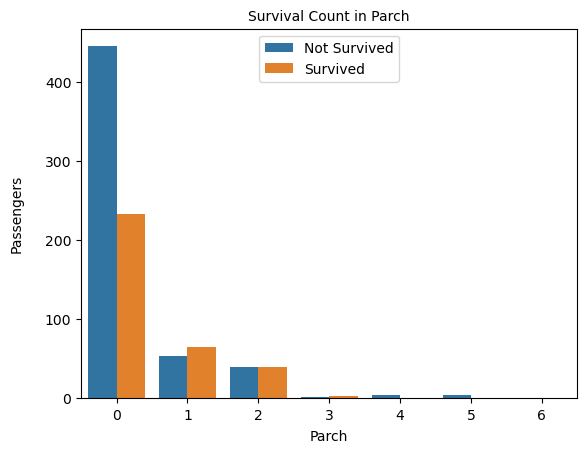

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [29]:
# Parch:

sns.countplot(x='Parch', hue='Survived', data=ex_train)
plt.xlabel('Parch', size=10, labelpad=5)
plt.ylabel('Passengers', size=10, labelpad=15)  
plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})
plt.title('Survival Count in Parch', size=10)
plt.show()
    
print(ex_train['Parch'].value_counts())

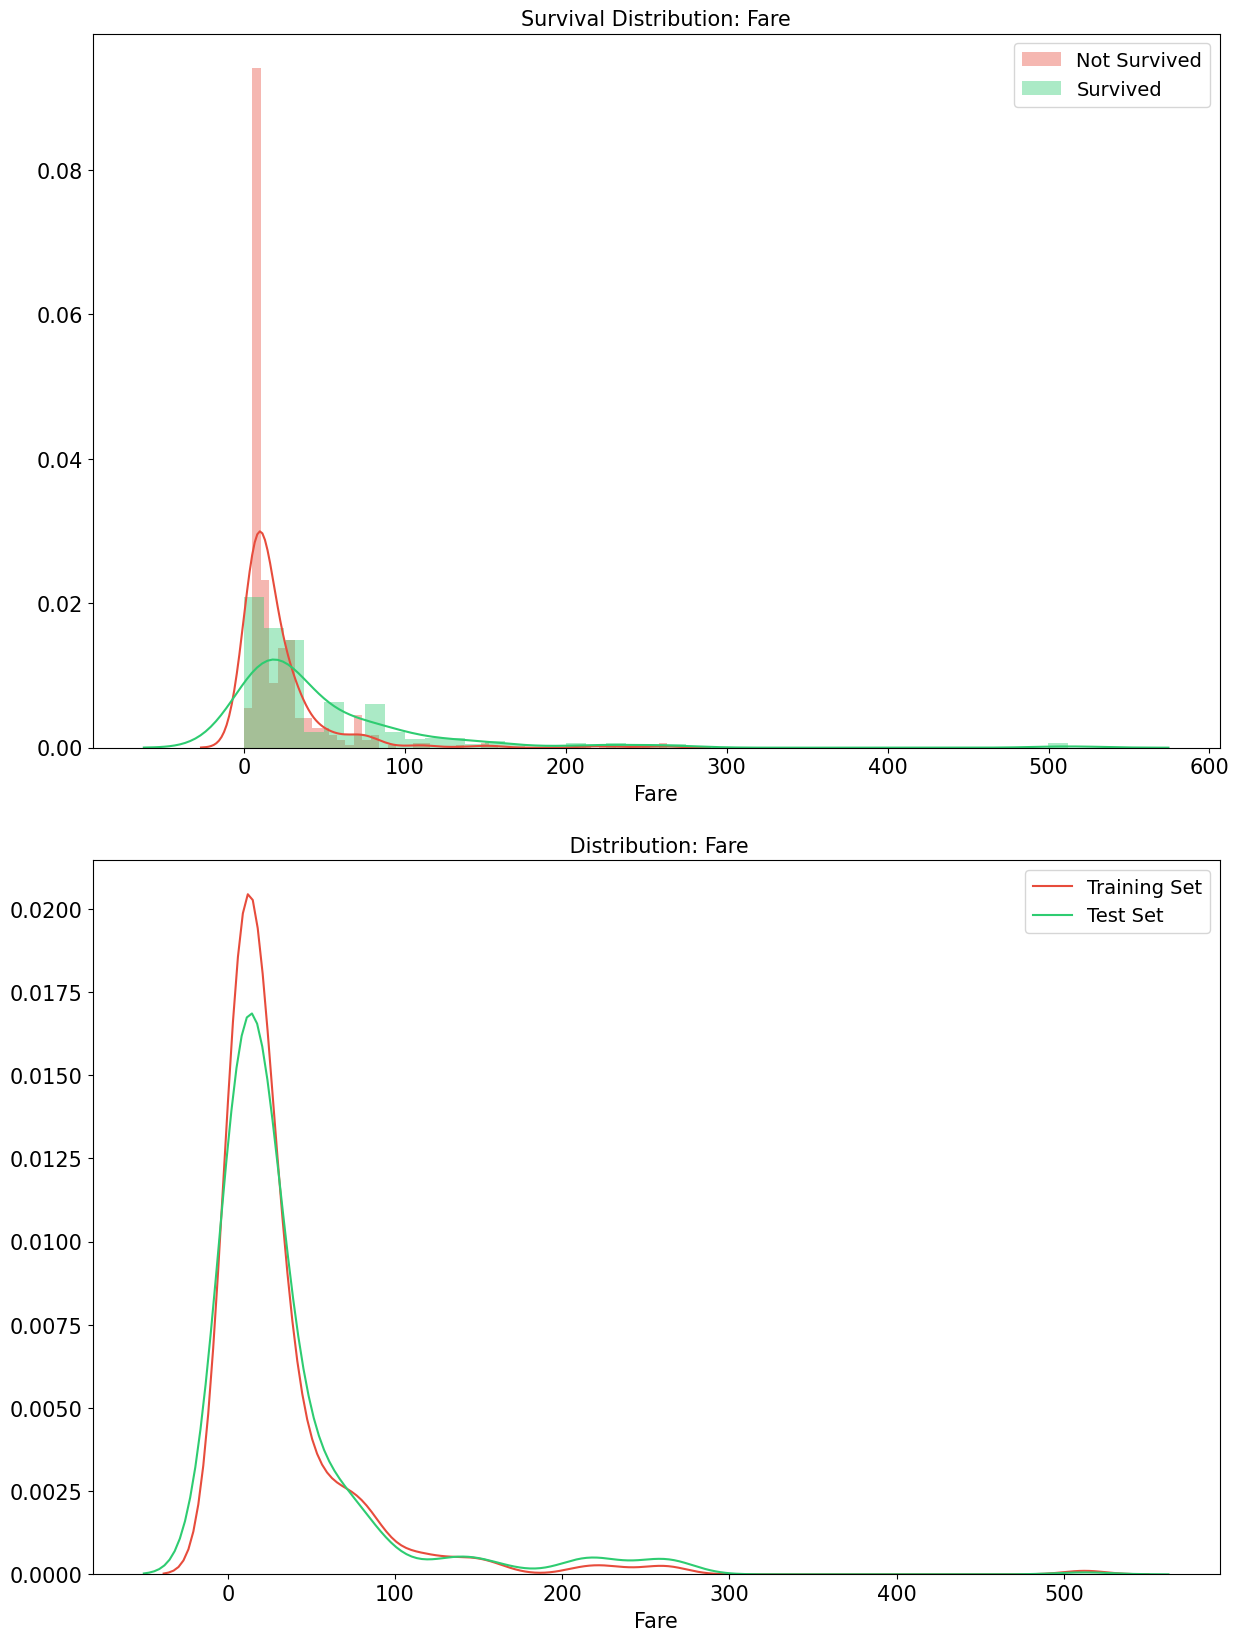

In [30]:
# Fare:

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
fig.tight_layout(h_pad=6)
    
survived = ex_train['Survived'] == 1

    # Distribution of survival in feature
sns.distplot(ex_train[~survived]['Fare'], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0])
sns.distplot(ex_train[survived]['Fare'], label='Survived', hist=True, color='#2ecc71', ax=axs[0])

    # Distribution of feature in dataset
sns.distplot(ex_train['Fare'], label='Training Set', hist=False, color='#e74c3c', ax=axs[1])
sns.distplot(ex_test['Fare'], label='Test Set', hist=False, color='#2ecc71', ax=axs[1])
    
axs[0].set_xlabel('Fare', size=15, labelpad=5)
axs[1].set_xlabel('Fare', size=15, labelpad=5)
axs[0].set_ylabel('')
axs[1].set_ylabel('')
    
axs[0].tick_params(axis='x', labelsize=15)
axs[1].tick_params(axis='x', labelsize=15)
axs[0].tick_params(axis='y', labelsize=15)
axs[1].tick_params(axis='y', labelsize=15)
    
axs[0].legend(loc='upper right', prop={'size': 14})
axs[1].legend(loc='upper right', prop={'size': 14})
    
axs[0].set_title('Survival Distribution: Fare', size=15)
axs[1].set_title(' Distribution: Fare', size=15)
    
plt.show()

Fiiiling the one missing value in 'Fare' column of test dataset:

In [31]:
ex_test['Fare']=ex_test['Fare'].fillna(ex_train['Fare'].mean())

print('Missing fare in test set:{}'.format(ex_test['Fare'].isnull().sum()))

Missing fare in test set:0


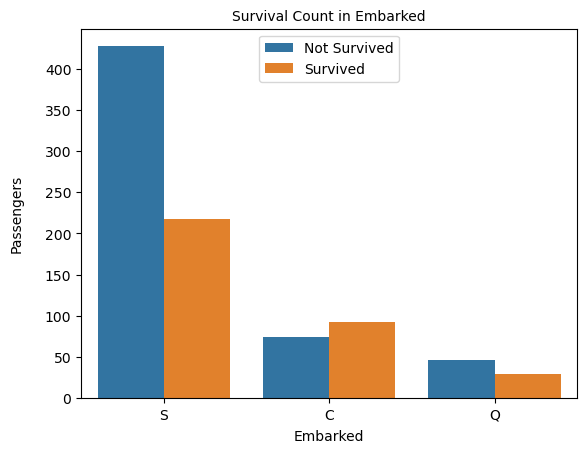

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [32]:
# Embarked:

sns.countplot(x='Embarked', hue='Survived', data=ex_train)
plt.xlabel('Embarked', size=10, labelpad=5)
plt.ylabel('Passengers', size=10, labelpad=15)  
plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})
plt.title('Survival Count in Embarked', size=10)
plt.show()
    
print(ex_train['Embarked'].value_counts())

'Embarked' has two missingvalues in training set. Removing those two rows from the training set:

In [35]:
ex_train.dropna(subset=['Embarked'], inplace=True)

print('Missing Embarked values:{}'.format(ex_train['Embarked'].isnull().sum()))

Missing Embarked values:0


## Feature Engineering:

In [36]:
ex_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
ex_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Label Encoding:

Converting non-numeric features (Sex and Embarked) to numeric features using LabelEncoder:

In [42]:
lab = LabelEncoder()

for ex in [ex_train, ex_test]:
    ex['Sex'] = lab.fit_transform(ex['Sex'])
    ex['Embarked'] = lab.fit_transform(ex['Embarked'])

In [43]:
ex_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [44]:
ex_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


### Splitting training and test data:

In [45]:
Y_train = ex_train.loc[:, ['Survived']]
X_train = ex_train.drop(axis=1, columns=['Survived'])

In [46]:
x_train, x_test, y_train, y_test = train_test_split( X_train, Y_train, test_size = 0.2, random_state = 42 )

### Scale and transform the data:

In [47]:
scl = StandardScaler()

scl.fit(X_train)
x_train = scl.transform(x_train)
x_test  = scl.transform(x_test)


## Fitting Multiple Models:

### Logistic Regression:

In [60]:


logistic = LogisticRegression(max_iter = 2000, C=1.5, penalty='l1', solver='liblinear')
cv = cross_val_score(logistic, x_train, y_train, cv=5)
print('Cross Validation Score :{}'.format(cv))

logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)
accuracy = round(accuracy_score(y_pred,y_test)*100, 2)
print('Model Accuracy:{}%'.format(accuracy))




Cross Validation Score :[0.83216783 0.83802817 0.79577465 0.79577465 0.78169014]
Model Accuracy:79.78%


### Support Vector Machine:

In [61]:


svc = SVC(gamma=1.0, probability=True)

cv = cross_val_score(logistic, x_train, y_train, cv=5)
print('Cross Validation Score :{}'.format(cv))

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy = round(accuracy_score(y_pred,y_test)*100, 2)
print('Model Accuracy:{}%'.format(accuracy))


Cross Validation Score :[0.83216783 0.83802817 0.79577465 0.79577465 0.78169014]
Model Accuracy:80.34%


### Naive Bayes:

In [62]:
nb = GaussianNB()

cv = cross_val_score(logistic, x_train, y_train, cv=5)
print('Cross Validation Score :{}'.format(cv))

nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
accuracy = round(accuracy_score(y_pred,y_test)*100, 2)
print('Model Accuracy:{}%'.format(accuracy))


Cross Validation Score :[0.83216783 0.83802817 0.79577465 0.79577465 0.78169014]
Model Accuracy:77.53%


### Decision Tree:

In [63]:
dt = DecisionTreeClassifier(random_state=1)

cv = cross_val_score(logistic, x_train, y_train, cv=5)
print('Cross Validation Score :{}'.format(cv))

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy = round(accuracy_score(y_pred,y_test)*100, 2)
print('Model Accuracy:{}%'.format(accuracy))


Cross Validation Score :[0.83216783 0.83802817 0.79577465 0.79577465 0.78169014]
Model Accuracy:74.16%
